In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0059.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0024.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0232.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0286.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0233.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0123.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0150.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-piTr_0009.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0078.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0283.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pituitary/Te-pi_0084.jpg
/kaggle/input/brain-tumour-classification/BrainTumor_1/Test/pit

In [2]:
base_path = "/kaggle/input/brain-tumour-classification/BrainTumor_1/Train"
categories = ["glioma", "meningioma", "notumor", "pituitary"]

In [3]:
image_paths = []
labels = []

for category in categories:
    category_path = os.path.join(base_path, category)
    for image_name in os.listdir(category_path):
        image_path = os.path.join(category_path, image_name)
        image_paths.append(image_path)
        labels.append(category)  

df = pd.DataFrame({
    "image_path": image_paths,
    "label": labels
})

In [4]:
df.head()

,image_path,label
0,/kaggle/input/brain-tumour-classification/Brai...,glioma
1,/kaggle/input/brain-tumour-classification/Brai...,glioma
2,/kaggle/input/brain-tumour-classification/Brai...,glioma
3,/kaggle/input/brain-tumour-classification/Brai...,glioma
4,/kaggle/input/brain-tumour-classification/Brai...,glioma


In [5]:
df.tail()

,image_path,label
22843,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22844,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22845,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22846,/kaggle/input/brain-tumour-classification/Brai...,pituitary
22847,/kaggle/input/brain-tumour-classification/Brai...,pituitary


In [6]:
df.shape

(22848, 2)

In [7]:
df.columns

Index(['image_path', 'label'], dtype='object')

In [8]:
df['label'].unique()

array(['glioma', 'meningioma', 'notumor', 'pituitary'], dtype=object)

In [9]:
df['label'].value_counts()

label
notumor       6380
pituitary     5828
meningioma    5356
glioma        5284
Name: count, dtype: int64

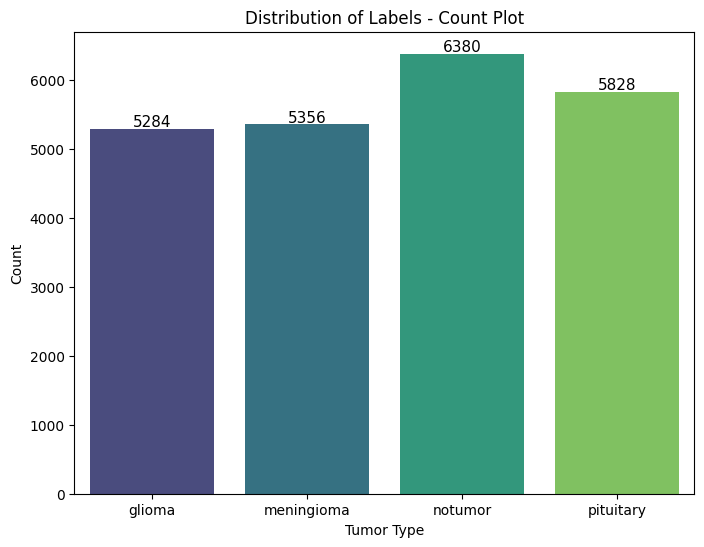

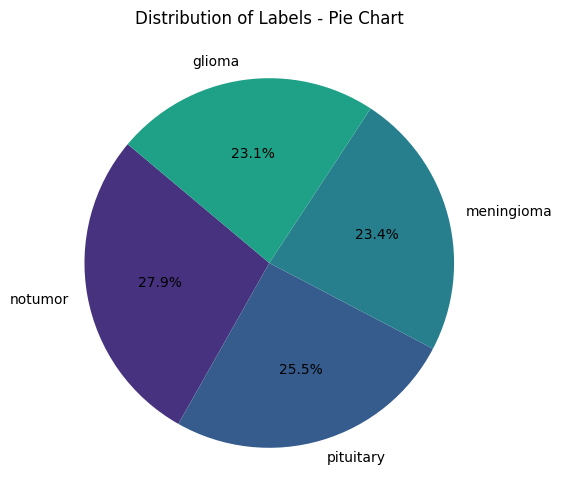

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", palette="viridis")
plt.title("Distribution of Labels - Count Plot")
plt.xlabel("Tumor Type")
plt.ylabel("Count")

for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', fontsize=11, color='black', xytext=(0, 5), 
                       textcoords='offset points')

plt.show()

label_counts = df['label'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title("Distribution of Labels - Pie Chart")
plt.show()

In [ ]:
import cv2

num_images = 5

plt.figure(figsize=(15, 12))

for i, category in enumerate(categories):
    category_images = df[df['label'] == category]['image_path'].iloc[:num_images]

    for j, img_path in enumerate(category_images):

        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  

        plt.subplot(len(categories), num_images, i * num_images + j + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(category)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['category_encoded'] = label_encoder.fit_transform(df['label'])

In [ ]:
df = df[['image_path', 'category_encoded']]

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(df[['image_path']], df['category_encoded'])

In [ ]:
df_resampled = pd.DataFrame(X_resampled, columns=['image_path'])
df_resampled['category_encoded'] = y_resampled

In [ ]:
print("\nClass distribution after oversampling:")
print(df_resampled['category_encoded'].value_counts())

In [ ]:
df_resampled

In [ ]:
df_resampled['category_encoded'] = df_resampled['category_encoded'].astype(str)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

import warnings
warnings.filterwarnings("ignore")

print ('check')

check


In [21]:
train_df_new, temp_df_new = train_test_split(
    df_resampled,
    train_size=0.8,  
    shuffle=True,
    random_state=42,
    stratify=df_resampled['category_encoded']  
)

valid_df_new, test_df_new = train_test_split(
    temp_df_new,
    test_size=0.5,  
    shuffle=True,
    random_state=42,
    stratify=temp_df_new['category_encoded'] 
)

In [22]:
batch_size = 16
img_size = (224, 224)
channels = 3  
img_shape = (img_size[0], img_size[1], channels)

tr_gen = ImageDataGenerator(rescale=1./255)  
ts_gen = ImageDataGenerator(rescale=1./255)

train_gen_new = tr_gen.flow_from_dataframe(
    train_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

valid_gen_new = ts_gen.flow_from_dataframe(
    valid_df_new,
    x_col='image_path',  
    y_col='category_encoded',     
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=True,
    batch_size=batch_size
)

test_gen_new = ts_gen.flow_from_dataframe(
    test_df_new,
    x_col='image_path', 
    y_col='category_encoded',    
    target_size=img_size,
    class_mode='sparse',  
    color_mode='rgb', 
    shuffle=False,  
    batch_size=batch_size
)

Found 20416 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.
Found 2552 validated image filenames belonging to 4 classes.


In [23]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  2


In [24]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU is set for TensorFlow")
    except RuntimeError as e:
        print(e)

GPU is set for TensorFlow


In [25]:
from tensorflow.keras import layers

class PatchEmbedding(layers.Layer):
    def __init__(self, patch_size, embed_dim):
        super(PatchEmbedding, self).__init__()
        self.patch_size = patch_size
        self.embed_dim = embed_dim
        self.proj = layers.Conv2D(embed_dim, patch_size, strides=patch_size, padding='valid')

    def call(self, images):
        patches = self.proj(images)
        patches = tf.reshape(patches, (tf.shape(patches)[0], -1, self.embed_dim))  # Flatten patches
        return patches

class MultiHeadSelfAttention(layers.Layer):
    def __init__(self, num_heads, embed_dim):
        super(MultiHeadSelfAttention, self).__init__()
        self.attention = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)

    def call(self, inputs):
        return self.attention(inputs, inputs)

class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, mlp_dim, dropout_rate):
        super(TransformerBlock, self).__init__()
        self.attention = MultiHeadSelfAttention(num_heads, embed_dim)
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.mlp = tf.keras.Sequential([
            layers.Dense(mlp_dim, activation='gelu'),
            layers.Dropout(dropout_rate),
            layers.Dense(embed_dim),
            layers.Dropout(dropout_rate)
        ])

    def call(self, inputs):
        x = self.layernorm1(inputs)
        x = self.attention(x)
        x = x + inputs
        x = self.layernorm2(x)
        x = self.mlp(x)
        return x + inputs

class VisionTransformer(tf.keras.Model):
    def __init__(self, image_size, patch_size, embed_dim, num_heads, num_blocks, mlp_dim, num_classes, dropout_rate=0.1):
        super(VisionTransformer, self).__init__()
        self.patch_embed = PatchEmbedding(patch_size, embed_dim)
        
        height, width, _ = image_size
        num_patches = (height // patch_size) * (width // patch_size) 
        
        self.pos_embed = self.add_weight(
            name="pos_embed",
            shape=(1, num_patches + 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )
        
        self.cls_token = self.add_weight(
            name="cls_token",
            shape=(1, 1, embed_dim),
            initializer=tf.initializers.RandomNormal(stddev=0.02),
            trainable=True
        )
        
        self.dropout = layers.Dropout(dropout_rate)
        self.transformer_blocks = [TransformerBlock(embed_dim, num_heads, mlp_dim, dropout_rate) for _ in range(num_blocks)]
        self.layernorm = layers.LayerNormalization(epsilon=1e-6)
        self.classifier = layers.Dense(num_classes, activation='softmax')  

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = self.patch_embed(images)
        
        cls_tokens = tf.repeat(self.cls_token, repeats=batch_size, axis=0)  
        x = tf.concat([cls_tokens, patches], axis=1)
        
        pos_embed = tf.repeat(self.pos_embed, repeats=batch_size, axis=0)
        x = x + pos_embed  
        x = self.dropout(x)
        
        for block in self.transformer_blocks:
            x = block(x)
            
        x = self.layernorm(x)
        cls_token_final = x[:, 0]  
        return self.classifier(cls_token_final)  


image_size = (224, 224, 3)  
patch_size = 16  
embed_dim = 256  
num_heads = 8  
num_blocks = 6  
mlp_dim = 256  
num_classes = 4 
dropout_rate = 0.1 
learning_rate = 1e-5  

vit_model = VisionTransformer(image_size=image_size, 
                              patch_size=patch_size, 
                              embed_dim=embed_dim, 
                              num_heads=num_heads, 
                              num_blocks=num_blocks, 
                              mlp_dim=mlp_dim, 
                              num_classes=num_classes, 
                              dropout_rate=dropout_rate)

vit_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate), 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy'])

In [26]:
epochs = 3 
history = vit_model.fit(train_gen_new, epochs=epochs, batch_size = 32, validation_data=valid_gen_new)

Epoch 1/3
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 224s 154ms/step - accuracy: 0.4454 - loss: 1.2120 - val_accuracy: 0.6524 - val_loss: 0.9022
Epoch 2/3
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 212s 166ms/step - accuracy: 0.7162 - loss: 0.7426 - val_accuracy: 0.8084 - val_loss: 0.5040
Epoch 3/3
1276/1276 ━━━━━━━━━━━━━━━━━━━━ 217s 170ms/step - accuracy: 0.8313 - loss: 0.4579 - val_accuracy: 0.8542 - val_loss: 0.3893


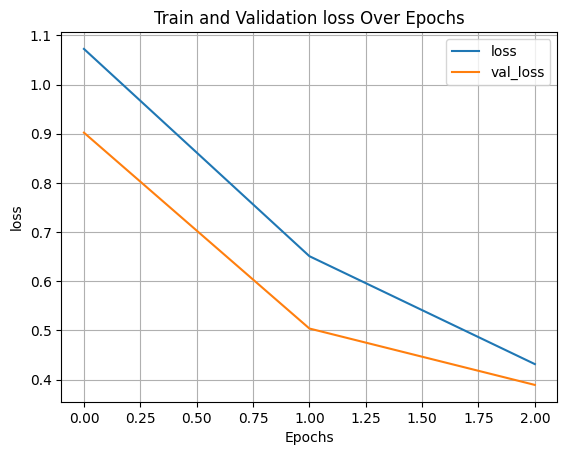

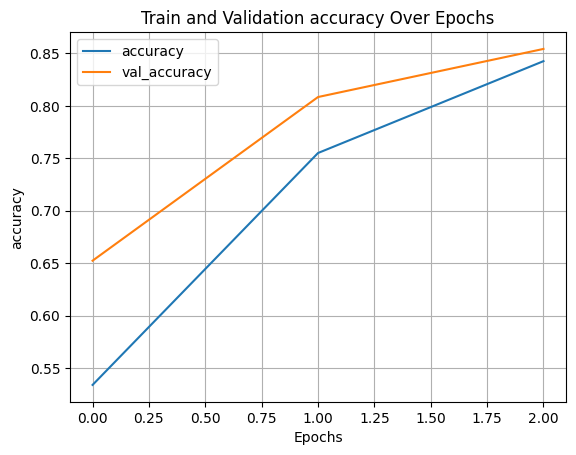

In [27]:
def plot_history(item):
    plt.plot(history.history[item], label=item)
    plt.plot(history.history["val_" + item], label="val_" + item)
    plt.xlabel("Epochs")
    plt.ylabel(item)
    plt.title(f"Train and Validation {item} Over Epochs")
    plt.legend()
    plt.grid()
    plt.show()

plot_history("loss")
plot_history("accuracy")